# ABALONE AGE PREDICTION

Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

To predict the rings of each abalone which will lead us to the age of that abalone.

**Attribute Information**

Name	Data Type	Meas.	Description

Sex	nominal		M, F, and I (infant)

Length	continuous	mm	Longest shell measurement

Diameter	continuous	mm	perpendicular to length

Height	continuous	mm	with meat in shell

Whole weight	continuous	grams	whole abalone

Shucked weight	continuous	grams	weight of meat

Viscera weight	continuous	grams	gut weight (after bleeding)

Shell weight	continuous	grams	after being dried

Rings	integer		+1.5 gives the age in years


In [9]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split ,  cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn import metrics

In [10]:
abdf = pd.read_csv('abalone.csv',sep = ',')
pd.set_option('display.max_rows' , None)
abdf

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
5      I   0.425     0.300   0.095        0.3515          0.1410   
6      F   0.530     0.415   0.150        0.7775          0.2370   
7      F   0.545     0.425   0.125        0.7680          0.2940   
8      M   0.475     0.370   0.125        0.5095          0.2165   
9      F   0.550     0.440   0.150        0.8945          0.3145   
10     F   0.525     0.380   0.140        0.6065          0.1940   
11     M   0.430     0.350   0.110        0.4060          0.1675   
12     M   0.490     0.380   0.135        0.5415          0.2175   
13     F   0.535     0.405   0.145        0.6845          0.2725   
14     F   0.470     0.355   0.100        0.4755          0.1675   
15     M   0.500     0.400   0.130        0.6645          0.2580   
16     I   0.355     0.280   0.085        0.2905          0.0950   
17     F   0.440     0.340   0.100        0.4510          0.1880   
18     M   0.365     0.295   0.080        0.2555          0.0970   
19     M   0.450     0.320   0.100        0.3810          0.1705   
20     M   0.355     0.280   0.095        0.2455          0.0955   
21     I   0.380     0.275   0.100        0.2255          0.0800   
22     F   0.565     0.440   0.155        0.9395          0.4275   
23     F   0.550     0.415   0.135        0.7635          0.3180   
24     F   0.615     0.480   0.165        1.1615          0.5130   
25     F   0.560     0.440   0.140        0.9285          0.3825   
26     F   0.580     0.450   0.185        0.9955          0.3945   
27     M   0.590     0.445   0.140        0.9310          0.3560   
28     M   0.605     0.475   0.180        0.9365          0.3940   
29     M   0.575     0.425   0.140        0.8635          0.3930   
30     M   0.580     0.470   0.165        0.9975          0.3935   
31     F   0.680     0.560   0.165        1.6390          0.6055   
32     M   0.665     0.525   0.165        1.3380          0.5515   
33     F   0.680     0.550   0.175        1.7980          0.8150   
34     F   0.705     0.550   0.200        1.7095          0.6330   
35     M   0.465     0.355   0.105        0.4795          0.2270   
36     F   0.540     0.475   0.155        1.2170          0.5305   
37     F   0.450     0.355   0.105        0.5225          0.2370   
38     F   0.575     0.445   0.135        0.8830          0.3810   
39     M   0.355     0.290   0.090        0.3275          0.1340   
40     F   0.450     0.335   0.105        0.4250          0.1865   
41     F   0.550     0.425   0.135        0.8515          0.3620   
42     I   0.240     0.175   0.045        0.0700          0.0315   
43     I   0.205     0.150   0.055        0.0420          0.0255   
44     I   0.210     0.150   0.050        0.0420          0.0175   
45     I   0.390     0.295   0.095        0.2030          0.0875   
46     M   0.470     0.370   0.120        0.5795          0.2930   
47     F   0.460     0.375   0.120        0.4605          0.1775   
48     I   0.325     0.245   0.070        0.1610          0.0755   
49     F   0.525     0.425   0.160        0.8355          0.3545   
50     I   0.520     0.410   0.120        0.5950          0.2385   
51     M   0.400     0.320   0.095        0.3030          0.1335   
52     M   0.485     0.360   0.130        0.5415          0.2595   
53     F   0.470     0.360   0.120        0.4775          0.2105   
54     M   0.405     0.310   0.100        0.3850          0.1730   
55     F   0.500     0.400   0.140        0.6615          0.2565   
56     M   0.445     0.350   0.120        0.4425          0.1920   
57     M   0.470     0.385   0.135        0.5895          0.2

In [11]:
abdf.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

In [12]:
#Checking  for Null Values
abdf.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [13]:
#Extracting information about the dataframe 
abdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [14]:
#Encoding the Sex column encoding I , M , F 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
abdf["Sex"] = le.fit_transform(abdf["Sex"])
abdf

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       2   0.455     0.365   0.095        0.5140          0.2245   
1       2   0.350     0.265   0.090        0.2255          0.0995   
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       2   0.440     0.365   0.125        0.5160          0.2155   
4       1   0.330     0.255   0.080        0.2050          0.0895   
5       1   0.425     0.300   0.095        0.3515          0.1410   
6       0   0.530     0.415   0.150        0.7775          0.2370   
7       0   0.545     0.425   0.125        0.7680          0.2940   
8       2   0.475     0.370   0.125        0.5095          0.2165   
9       0   0.550     0.440   0.150        0.8945          0.3145   
10      0   0.525     0.380   0.140        0.6065          0.1940   
11      2   0.430     0.350   0.110        0.4060          0.1675   
12      2   0.490     0.380   0.135        0.5415          0.2175   
13      0   0.535     0.405   0.145        0.6845          0.2725   
14      0   0.470     0.355   0.100        0.4755          0.1675   
15      2   0.500     0.400   0.130        0.6645          0.2580   
16      1   0.355     0.280   0.085        0.2905          0.0950   
17      0   0.440     0.340   0.100        0.4510          0.1880   
18      2   0.365     0.295   0.080        0.2555          0.0970   
19      2   0.450     0.320   0.100        0.3810          0.1705   
20      2   0.355     0.280   0.095        0.2455          0.0955   
21      1   0.380     0.275   0.100        0.2255          0.0800   
22      0   0.565     0.440   0.155        0.9395          0.4275   
23      0   0.550     0.415   0.135        0.7635          0.3180   
24      0   0.615     0.480   0.165        1.1615          0.5130   
25      0   0.560     0.440   0.140        0.9285          0.3825   
26      0   0.580     0.450   0.185        0.9955          0.3945   
27      2   0.590     0.445   0.140        0.9310          0.3560   
28      2   0.605     0.475   0.180        0.9365          0.3940   
29      2   0.575     0.425   0.140        0.8635          0.3930   
30      2   0.580     0.470   0.165        0.9975          0.3935   
31      0   0.680     0.560   0.165        1.6390          0.6055   
32      2   0.665     0.525   0.165        1.3380          0.5515   
33      0   0.680     0.550   0.175        1.7980          0.8150   
34      0   0.705     0.550   0.200        1.7095          0.6330   
35      2   0.465     0.355   0.105        0.4795          0.2270   
36      0   0.540     0.475   0.155        1.2170          0.5305   
37      0   0.450     0.355   0.105        0.5225          0.2370   
38      0   0.575     0.445   0.135        0.8830          0.3810   
39      2   0.355     0.290   0.090        0.3275          0.1340   
40      0   0.450     0.335   0.105        0.4250          0.1865   
41      0   0.550     0.425   0.135        0.8515          0.3620   
42      1   0.240     0.175   0.045        0.0700          0.0315   
43      1   0.205     0.150   0.055        0.0420          0.0255   
44      1   0.210     0.150   0.050        0.0420          0.0175   
45      1   0.390     0.295   0.095        0.2030          0.0875   
46      2   0.470     0.370   0.120        0.5795          0.2930   
47      0   0.460     0.375   0.120        0.4605          0.1775   
48      1   0.325     0.245   0.070        0.1610          0.0755   
49      0   0.525     0.425   0.160        0.8355          0.3545   
50      1   0.520     0.410   0.120        0.5950          0.2385   
51      2   0.400     0.320   0.095        0.3030          0.1335   
52      2   0.485     0.360   0.130        0.5415          0.2595   
53      0   0.470     0.360   0.120        0.4775          0.2105   
54      2   0.405     0.310   0.100        0.3850          0.1730   
55      0   0.500     0.400   0.140        0.6615          0.2565   
56      2   0.445     0.350   0.120        0.4425          0.1920   
57  

In [51]:
#So from here we cam observe that values assigned to ['F' 'I' 'M'] are 0,1,2
print(le.classes_)

['F' 'I' 'M']


In [52]:
#Another way of checking for enncoded values are 
abdf_copy = abdf["Sex"]
abdf_dup = abdf_copy.drop_duplicates()
abdf_dup

0    2
2    0
4    1
Name: Sex, dtype: int32

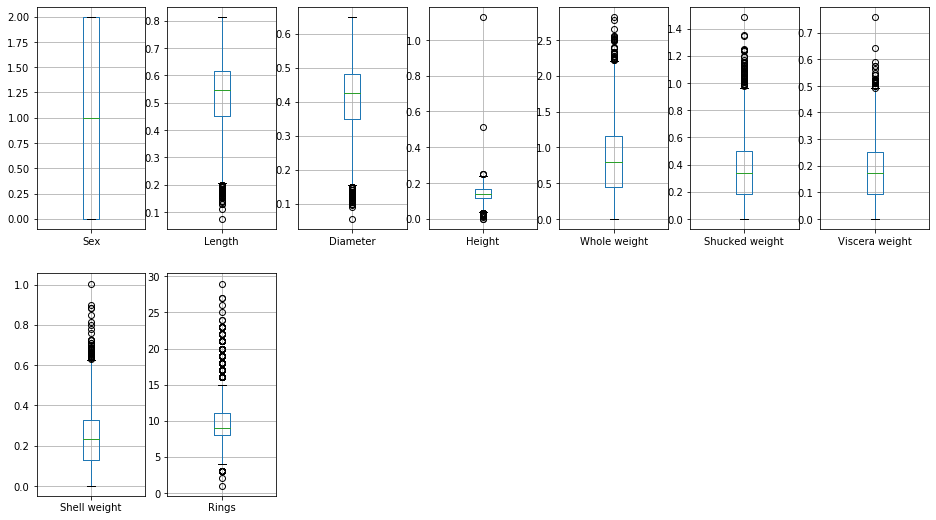

In [53]:
# Plotting boxplot to check for outliers
abdf.plot(kind= 'box', subplots = True , layout = (2,7) , figsize = (16,9) , grid = True )
plt.show()

Here we can see there are anumber of outliers , in different columns.


In [54]:
# Findin zscore for this DataFrame 
# A Z-score is a numerical measurement that describes a value's relationship to the mean of a group of values.

from scipy.stats import zscore
z_score = np.abs(zscore(abdf))
z_score

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [55]:
#Filtering values and creating a new dataframe with zscore < 3.
abdf_new = abdf[(z_score<3).all(axis = 1)]
abdf_new

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       2   0.455     0.365   0.095        0.5140          0.2245   
1       2   0.350     0.265   0.090        0.2255          0.0995   
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       2   0.440     0.365   0.125        0.5160          0.2155   
4       1   0.330     0.255   0.080        0.2050          0.0895   
5       1   0.425     0.300   0.095        0.3515          0.1410   
7       0   0.545     0.425   0.125        0.7680          0.2940   
8       2   0.475     0.370   0.125        0.5095          0.2165   
9       0   0.550     0.440   0.150        0.8945          0.3145   
10      0   0.525     0.380   0.140        0.6065          0.1940   
11      2   0.430     0.350   0.110        0.4060          0.1675   
12      2   0.490     0.380   0.135        0.5415          0.2175   
13      0   0.535     0.405   0.145        0.6845          0.2725   
14      0   0.470     0.355   0.100        0.4755          0.1675   
15      2   0.500     0.400   0.130        0.6645          0.2580   
16      1   0.355     0.280   0.085        0.2905          0.0950   
17      0   0.440     0.340   0.100        0.4510          0.1880   
18      2   0.365     0.295   0.080        0.2555          0.0970   
19      2   0.450     0.320   0.100        0.3810          0.1705   
20      2   0.355     0.280   0.095        0.2455          0.0955   
21      1   0.380     0.275   0.100        0.2255          0.0800   
22      0   0.565     0.440   0.155        0.9395          0.4275   
23      0   0.550     0.415   0.135        0.7635          0.3180   
24      0   0.615     0.480   0.165        1.1615          0.5130   
25      0   0.560     0.440   0.140        0.9285          0.3825   
26      0   0.580     0.450   0.185        0.9955          0.3945   
27      2   0.590     0.445   0.140        0.9310          0.3560   
28      2   0.605     0.475   0.180        0.9365          0.3940   
29      2   0.575     0.425   0.140        0.8635          0.3930   
30      2   0.580     0.470   0.165        0.9975          0.3935   
31      0   0.680     0.560   0.165        1.6390          0.6055   
32      2   0.665     0.525   0.165        1.3380          0.5515   
33      0   0.680     0.550   0.175        1.7980          0.8150   
34      0   0.705     0.550   0.200        1.7095          0.6330   
35      2   0.465     0.355   0.105        0.4795          0.2270   
36      0   0.540     0.475   0.155        1.2170          0.5305   
37      0   0.450     0.355   0.105        0.5225          0.2370   
38      0   0.575     0.445   0.135        0.8830          0.3810   
39      2   0.355     0.290   0.090        0.3275          0.1340   
40      0   0.450     0.335   0.105        0.4250          0.1865   
41      0   0.550     0.425   0.135        0.8515          0.3620   
42      1   0.240     0.175   0.045        0.0700          0.0315   
43      1   0.205     0.150   0.055        0.0420          0.0255   
44      1   0.210     0.150   0.050        0.0420          0.0175   
45      1   0.390     0.295   0.095        0.2030          0.0875   
46      2   0.470     0.370   0.120        0.5795          0.2930   
47      0   0.460     0.375   0.120        0.4605          0.1775   
48      1   0.325     0.245   0.070        0.1610          0.0755   
49      0   0.525     0.425   0.160        0.8355          0.3545   
50      1   0.520     0.410   0.120        0.5950          0.2385   
51      2   0.400     0.320   0.095        0.3030          0.1335   
52      2   0.485     0.360   0.130        0.5415          0.2595   
53      0   0.470     0.360   0.120        0.4775          0.2105   
54      2   0.405     0.310   0.100        0.3850          0.1730   
55      0   0.500     0.400   0.140        0.6615          0.2565   
56      2   0.445     0.350   0.120        0.4425          0.1920   
57      2   0.470     0.385   0.135        0.5895          0.2765   
58  

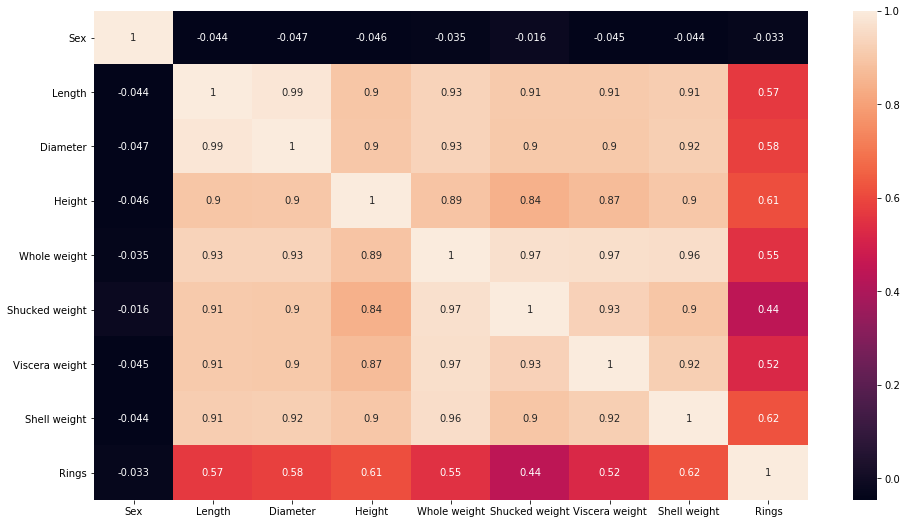

In [56]:
# Plotting a Correlation Heatmap 

corr = abdf_new.corr()
plt.figure(figsize = (16,9))
sns.heatmap(corr, annot = True)
plt.show()

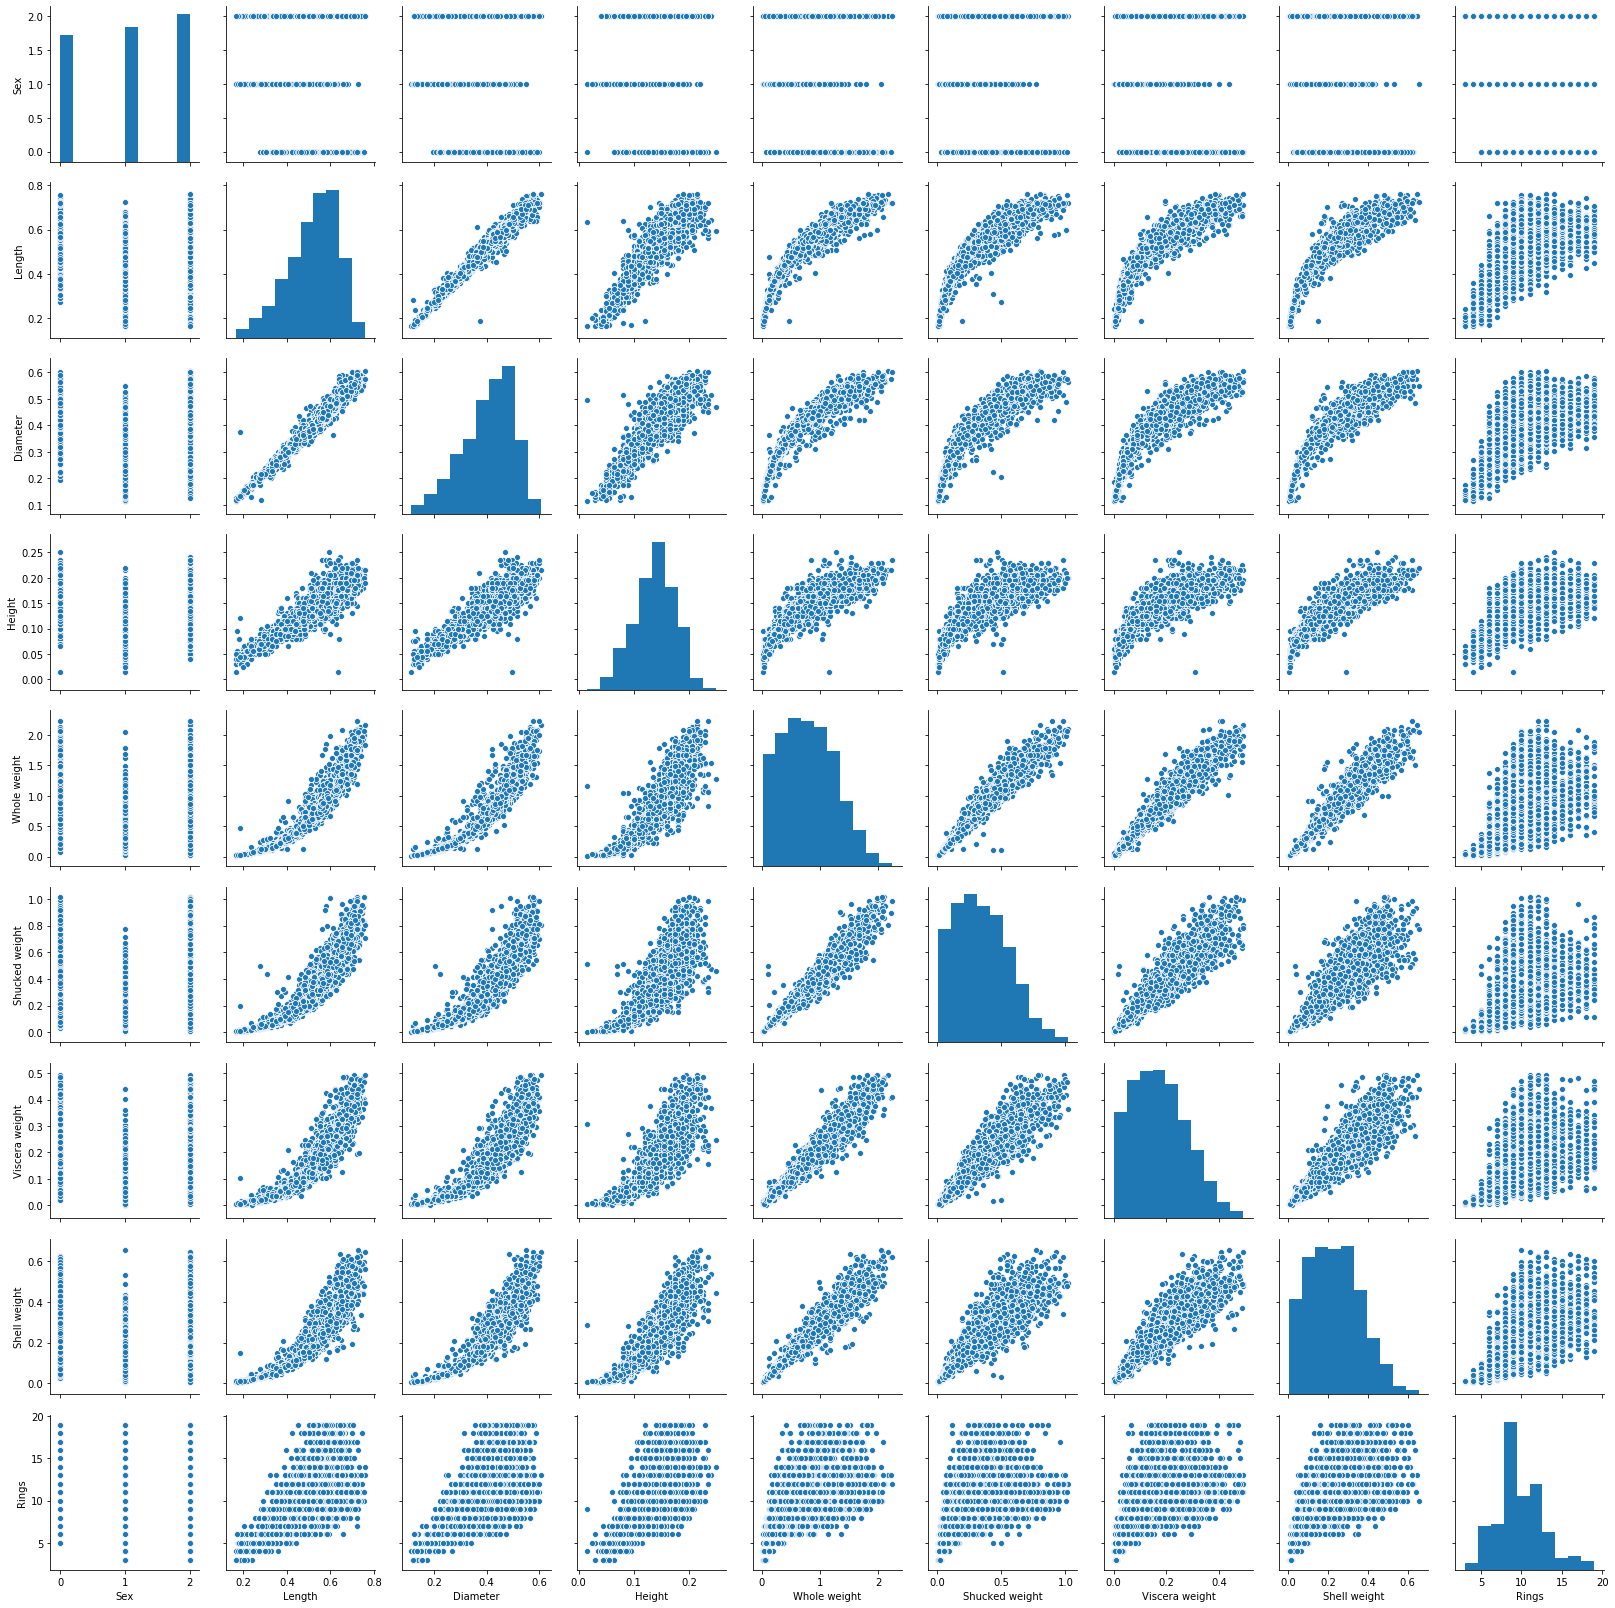

In [57]:
#A pairplot function creates a grid of Axes such that each variable in data 
#will by shared in the y-axis across a single row and in the x-axis across a single column.

sns.pairplot(abdf_new)

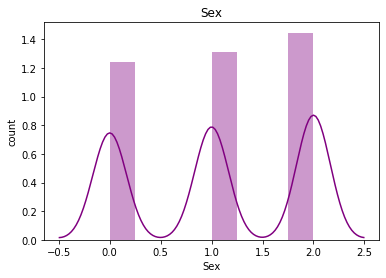

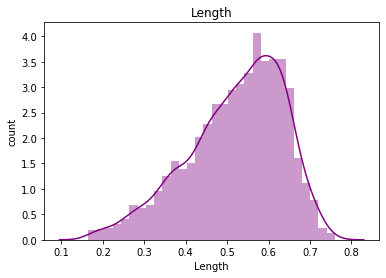

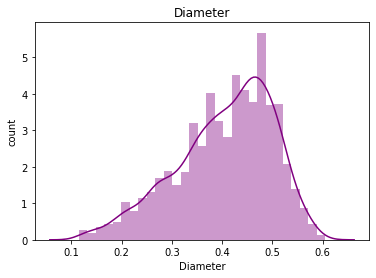

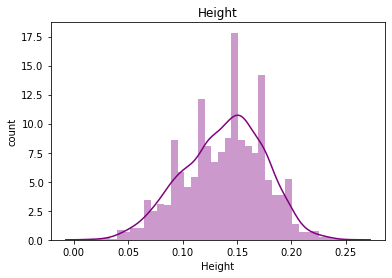

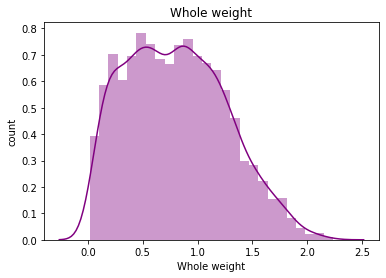

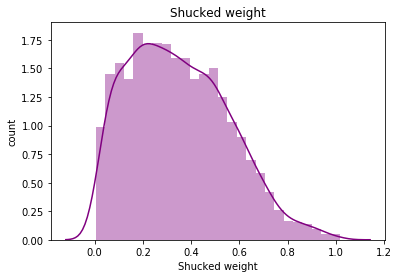

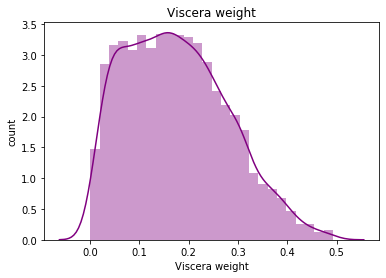

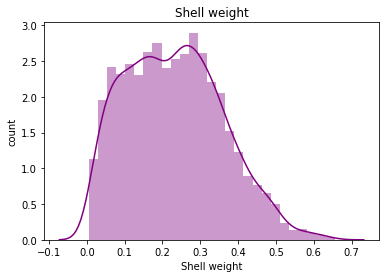

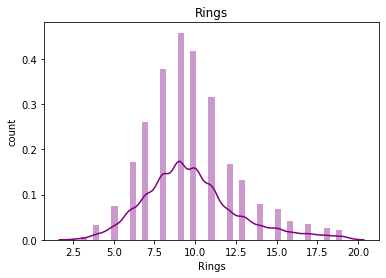

In [58]:
# Seaborn distplot lets you show a histogram with a line on it.
# The distplot() function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions.

for feature in abdf_new :
    sns.distplot(abdf_new[feature] , kde = True , color = 'purple' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

In [59]:
# Finding Min & Max values for each Column 

for i in  abdf_new :
    print('MIN : ' , i , min(abdf_new[i]))
    print('MAX : ' , i , max(abdf_new[i]))

MIN :  Sex 0
MAX :  Sex 2
MIN :  Length 0.165
MAX :  Length 0.76
MIN :  Diameter 0.115
MAX :  Diameter 0.605
MIN :  Height 0.015
MAX :  Height 0.25
MIN :  Whole weight 0.0145
MAX :  Whole weight 2.2385
MIN :  Shucked weight 0.0055
MAX :  Shucked weight 1.0170000000000001
MIN :  Viscera weight 0.0005
MAX :  Viscera weight 0.4925
MIN :  Shell weight 0.005
MAX :  Shell weight 0.655
MIN :  Rings 3
MAX :  Rings 19


In [60]:
#Excluding Rings Column 

x = abdf.iloc[: , : -1]
print(x.shape)
x

(4177, 8)


Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       2   0.455     0.365   0.095        0.5140          0.2245   
1       2   0.350     0.265   0.090        0.2255          0.0995   
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       2   0.440     0.365   0.125        0.5160          0.2155   
4       1   0.330     0.255   0.080        0.2050          0.0895   
5       1   0.425     0.300   0.095        0.3515          0.1410   
6       0   0.530     0.415   0.150        0.7775          0.2370   
7       0   0.545     0.425   0.125        0.7680          0.2940   
8       2   0.475     0.370   0.125        0.5095          0.2165   
9       0   0.550     0.440   0.150        0.8945          0.3145   
10      0   0.525     0.380   0.140        0.6065          0.1940   
11      2   0.430     0.350   0.110        0.4060          0.1675   
12      2   0.490     0.380   0.135        0.5415          0.2175   
13      0   0.535     0.405   0.145        0.6845          0.2725   
14      0   0.470     0.355   0.100        0.4755          0.1675   
15      2   0.500     0.400   0.130        0.6645          0.2580   
16      1   0.355     0.280   0.085        0.2905          0.0950   
17      0   0.440     0.340   0.100        0.4510          0.1880   
18      2   0.365     0.295   0.080        0.2555          0.0970   
19      2   0.450     0.320   0.100        0.3810          0.1705   
20      2   0.355     0.280   0.095        0.2455          0.0955   
21      1   0.380     0.275   0.100        0.2255          0.0800   
22      0   0.565     0.440   0.155        0.9395          0.4275   
23      0   0.550     0.415   0.135        0.7635          0.3180   
24      0   0.615     0.480   0.165        1.1615          0.5130   
25      0   0.560     0.440   0.140        0.9285          0.3825   
26      0   0.580     0.450   0.185        0.9955          0.3945   
27      2   0.590     0.445   0.140        0.9310          0.3560   
28      2   0.605     0.475   0.180        0.9365          0.3940   
29      2   0.575     0.425   0.140        0.8635          0.3930   
30      2   0.580     0.470   0.165        0.9975          0.3935   
31      0   0.680     0.560   0.165        1.6390          0.6055   
32      2   0.665     0.525   0.165        1.3380          0.5515   
33      0   0.680     0.550   0.175        1.7980          0.8150   
34      0   0.705     0.550   0.200        1.7095          0.6330   
35      2   0.465     0.355   0.105        0.4795          0.2270   
36      0   0.540     0.475   0.155        1.2170          0.5305   
37      0   0.450     0.355   0.105        0.5225          0.2370   
38      0   0.575     0.445   0.135        0.8830          0.3810   
39      2   0.355     0.290   0.090        0.3275          0.1340   
40      0   0.450     0.335   0.105        0.4250          0.1865   
41      0   0.550     0.425   0.135        0.8515          0.3620   
42      1   0.240     0.175   0.045        0.0700          0.0315   
43      1   0.205     0.150   0.055        0.0420          0.0255   
44      1   0.210     0.150   0.050        0.0420          0.0175   
45      1   0.390     0.295   0.095        0.2030          0.0875   
46      2   0.470     0.370   0.120        0.5795          0.2930   
47      0   0.460     0.375   0.120        0.4605          0.1775   
48      1   0.325     0.245   0.070        0.1610          0.0755   
49      0   0.525     0.425   0.160        0.8355          0.3545   
50      1   0.520     0.410   0.120        0.5950          0.2385   
51      2   0.400     0.320   0.095        0.3030          0.1335   
52      2   0.485     0.360   0.130        0.5415          0.2595   
53      0   0.470     0.360   0.120        0.4775          0.2105   
54      2   0.405     0.310   0.100        0.3850          0.1730   
55      0   0.500     0.400   0.140        0.6615          0.2565   
56      2   0.445     0.350   0.120        0.4425          0.1920   
57  

In [61]:
# Rings Columns 
y = abdf.iloc[: , -1:]
print(y.shape)
print(y)

(4177, 1)
      Rings
0        15
1         7
2         9
3        10
4         7
5         8
6        20
7        16
8         9
9        19
10       14
11       10
12       11
13       10
14       10
15       12
16        7
17       10
18        7
19        9
20       11
21       10
22       12
23        9
24       10
25       11
26       11
27       12
28       15
29       11
30       10
31       15
32       18
33       19
34       13
35        8
36       16
37        8
38       11
39        9
40        9
41       14
42        5
43        5
44        4
45        7
46        9
47        7
48        6
49        9
50        8
51        7
52       10
53       10
54        7
55        8
56        8
57        8
58        4
59        7
60        7
61        9
62       10
63        7
64        8
65        8
66       12
67       13
68       10
69        6
70       13
71        8
72       20
73       11
74       13
75       15
76        9
77       10
78       11
79       14
80        9
81    

In [62]:
print(type(y))

<class 'pandas.core.frame.DataFrame'>


In [63]:
# StandardScaler follows Standard Normal Distribution (SND). 
# Therefore, it makes mean = 0 and scales the data to unit variance.

abdf_sc = abdf.iloc[: , : -1]
scaled = StandardScaler()
scaled.fit_transform(abdf_sc)

array([[ 1.15198011, -0.57455813, -0.43214879, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [ 1.15198011, -1.44898585, -1.439929  , ..., -1.17090984,
        -1.20522124, -1.21298732],
       [-1.28068972,  0.05003309,  0.12213032, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67640943, ...,  0.74855917,
         0.97541324,  0.49695471],
       [-1.28068972,  0.84118198,  0.77718745, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.15198011,  1.54905203,  1.48263359, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [64]:
# Splitting thee dataset 
X_train , X_test , y_train , y_test = train_test_split(x , y , test_size = 0.33 , random_state = 165)

In [65]:
print("X_train's Shape : " , X_train.shape)
print("X_test's Shape : " , X_test.shape)
print("y_train's Shape : " , y_train.shape)
print("y_test's Shape : " , y_test.shape)

X_train's Shape :  (2798, 8)
X_test's Shape :  (1379, 8)
y_train's Shape :  (2798, 1)
y_test's Shape :  (1379, 1)


In [66]:
def rmse_cv(model, X_train, y):
    rmse =- (cross_val_score(model, X_train, y, scoring='neg_mean_squared_error', cv=5))
    return(rmse*100)

models = [LinearRegression(),
             Ridge(),
             SVR(),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             KNeighborsRegressor(n_neighbors = 4),]

names = ['LR','Ridge','svm','GNB','RF','GB','KNN']

for model,name in zip(models,names):
    fit = model.fit(X_train , y_train)
    score = model.score(X_train , y_train)
    print(name ," - " ,score)

LR  -  0.5525691701675967
Ridge  -  0.5453090112338426
svm  -  0.4312625660906537
GNB  -  0.917757971133284
RF  -  0.6792116749347161
GB  -  0.7067589235748595


So from above we can observe that RandomForestRegressor has the best score , So we'll use this only for our predictions.

In [67]:
rf = RandomForestRegressor()
rf.fit(X_train , y_train)
rf.score(X_train , y_train)

0.9179013089640831

In [68]:
y_pred = rf.predict(X_test)

In [69]:
print("Predicted result price : ",y_pred)
print("Actual price : ", y_test)

Predicted result price :  [10.3 10.5  7.4 ...  6.5  7.1 15.8]
Actual price :        Rings
3868      8
1346      8
303       6
1541      7
2389     11
2481      8
1198     10
1063      5
1142      9
2669      8
1659     10
2329     15
219       8
2185      9
617       7
2736      7
1175     10
1185      9
1524     11
3935     11
1450      7
3501     12
534      10
3632      5
1684      9
3704     11
2473     14
3778      9
1316      9
3201      6
3469     10
3340     17
3508      9
2427      6
2157     17
2422     12
4155      6
4097      9
3929     16
2666      8
2891      8
1702      9
1242      9
63        7
3938     10
3273     13
2944      7
1502     11
2822      7
1152      8
4042     10
4078     10
1796     10
1329      8
3365     11
66       12
3331     11
3603      7
1842      7
230      13
1787      8
1455      8
1193     12
4029      7
984      10
2463     17
4003      8
774      10
1965     11
3167     15
2919     10
2149      7
2517      7
2209     27
3831     10
4138     1

In [70]:
print("Error : ")

# MAE is the sum of absolute differences between our target and predicted variables. 
# So it measures the average magnitude of errors in a set of predictions, without considering their directions. 
print('Mean absolute error : ', mean_absolute_error(y_test,y_pred))

# MSE(Mean Squared Error) is the sum of squared distances between our target variable and predicted values.
print('Mean squared error : ', mean_squared_error(y_test,y_pred))

# Residuals are a measure of how far from the regression line data points are
print('Root mean squared error : ', np.sqrt(mean_squared_error(y_test,y_pred)))

Error : 
Mean absolute error :  1.6190717911530097
Mean squared error :  5.338034807831763
Root mean squared error :  2.3104187516187977


In [71]:
t1 = np.array([2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500])
t1 = t1.reshape(1,-1)
rf.predict(t1)

array([13.2])

In [72]:
t2 = np.array([2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700])
t2 = t2.reshape(1,-1)
rf.predict(t2)

array([7.7])